# **Godswill Otto**

## DSBA

* This is a simple linear regression task as it involves just 2 variables.
* You can use R, Python, SAS Enterprise Miner or any other tool
* Data can be found at http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/ day?



### Import all the neccessary libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Get the data and sample

In [2]:

link = "http://bit.ly/w-data"

study_data = pd.read_csv(link)
print("Data imported successfully")

study_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
study_data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
study_data['Scores'].corr(study_data['Hours'])

0.9761906560220887

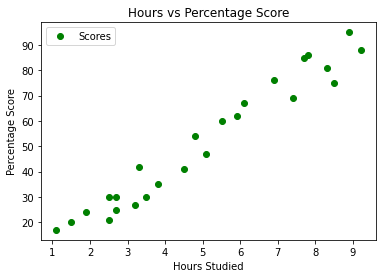

In [5]:

study_data.plot(x='Hours', y='Scores', style = 'go' )  
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### there is a strong positive linear correlation between the number of hours studied and the Sccore 

### Preparing the data

In [6]:
X = study_data[study_data.columns[:-1]].values
y = study_data['Scores'].values

In [7]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=90)

## Training The algorithm

In [10]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


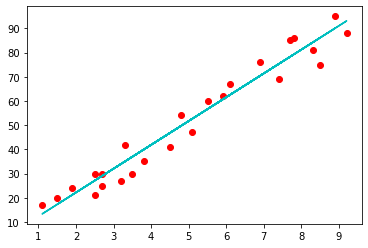

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color = 'r')
plt.plot(X, line,color = 'c');
plt.show()

### **Making Predictions**

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[5.1]
 [3.8]
 [4.8]
 [2.7]
 [8.9]
 [9.2]
 [8.3]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,47,52.696332
1,35,39.901259
2,54,49.743623
3,30,29.074659
4,95,90.097315
5,88,93.050024
6,81,84.191897


In [14]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours],])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.54214250976841


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.131987916160576
